In [14]:
import numpy as np

from tqdm import tqdm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
def f(x, y):
    return 20*np.exp(-((x-2.5)**2 + (y+1.5)**2)/5) + 3*(1+np.sin(0.008*np.pi*x*y)**2) +\
            3*(np.log(2+np.power(10*(x-2.4), 4) + np.power(10*(y+1.3),4)))/(1+np.power((x**2+y**2)/100, 0.1))

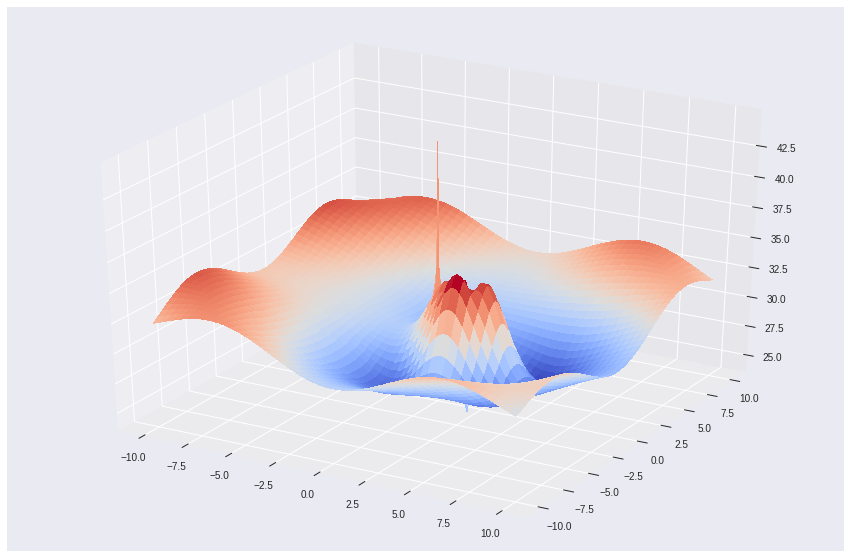

In [3]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10, 10, 0.05)
Y = np.arange(-10, 10, 0.05)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [16]:
def monte_carlo(func, iterations, x_range, y_range):
    def step():
        x = np.random.uniform(x_range[0], x_range[1])
        y = np.random.uniform(y_range[0], y_range[1])
        return x, y, func(x, y)
    
    best_x, best_y, best_res = step()
    for _ in tqdm(range(iterations - 1)):
        x, y, res = step()
        if res > best_res:
            best_x = x
            best_y = y
            best_res = res
    
    return best_x, best_y, best_res                   

In [17]:
true_max = np.max(Z)
monte_x, monte_y, monte_max = monte_carlo(f, 10000000, (-10, 10), (-10, 10))
print true_max, monte_max, np.abs(true_max - monte_max)

100%|██████████| 9999999/9999999 [03:08<00:00, 53059.99it/s]

44.9682502725 38.5531281893 6.4151220832


In [73]:
def cross_entropy(func, max_iter, sample_size, top_size):
    mu, sigma = [1., 1.], [1., 1.]
    while max_iter and np.mean(sigma) >= 0.0000000005:
        max_iter -= 1
        
        sample = np.random.normal(mu, sigma, size=(sample_size, 2))
        values = np.array([p[1] for p in sorted([(f(x, y), (x, y)) for (x, y) in sample], reverse=True)])
        
        mu = np.mean(values[:top_size], axis=0)
        sigma = np.var(values[:top_size], axis=0)
    
    return mu[0], mu[1], f(mu[0], mu[1])

In [74]:
ce_x, ce_y, ce_max = cross_entropy(f, 100, 100, 10)
print true_max, ce_max, np.abs(true_max - ce_max)

44.9682502725 33.6868076185 11.2814426541
